<a href="https://colab.research.google.com/github/aquangnguyen1992/Advanced_Data_Science_Capstone/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Get the dataset from Kaggle***

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
!kaggle competitions download -c ieee-fraud-detection
!unzip \*.zip  && rm *.zip

  0% 0.00/3.26M [00:00<?, ?B/s]
100% 3.26M/3.26M [00:00<00:00, 110MB/s]
 90% 47.0M/52.2M [00:01<00:00, 23.4MB/s]
100% 52.2M/52.2M [00:01<00:00, 51.3MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 75.8MB/s]
  0% 0.00/3.21M [00:00<?, ?B/s]
100% 3.21M/3.21M [00:00<00:00, 209MB/s]
 57% 33.0M/58.3M [00:01<00:00, 36.3MB/s]
100% 58.3M/58.3M [00:01<00:00, 47.7MB/s]
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  test_identity.csv.zip
  inflating: test_identity.csv       

Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   

Archive:  train_identity.csv.zip
  inflating: train_identity.csv      

Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    

5 archives were successfully processed.


# ***Analyzing the dataset and doing the cleansing***

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import copy
import os
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
os.chdir("/content")
dataset_transaction = pd.read_csv('train_transaction.csv')
dataset_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dataset_identity = pd.read_csv('train_identity.csv')
dataset_identity.head(5)
saved_columns= np.array(dataset_identity.columns)

In [ ]:
dataset_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [ ]:
dataset_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [ ]:
#Data transaction
float_columns = dataset_transaction.columns[np.where(dataset_transaction.dtypes == np.dtype('float64'))].to_list()
to_remove_NaN_dataset_transaction = []
removed = 0
for column in float_columns:
  count_NaN = np.sum(np.isnan(dataset_transaction[column].values))
  if count_NaN/len(dataset_transaction[column].values) > 0.9:
    to_remove_NaN_dataset_transaction.append(column)
    dataset_transaction.pop(column)
    removed += 1
print("Removed: " + str(removed))

Removed: 167


In [57]:
float_columns = dataset_transaction.columns[np.where(dataset_transaction.dtypes == np.dtype('float64'))].to_list()
to_remove_NaN_dataset_transaction = []
removed = 0
for column in float_columns:
  count_NaN = np.sum(np.isnan(dataset_transaction[column].values))
  if count_NaN/len(dataset_transaction[column].values) > 0.9:
    to_remove_NaN_dataset_transaction.append(column)

for column in to_remove_NaN_dataset_transaction:
  print(column)
  data_test = dataset_transaction[column]
  indices = np.where(np.isnan(data_test) == False)[0]
  data_b = dataset_transaction.iloc[indices]
  indices_fraud = np.where(data_b['isFraud'] == 1)[0]
  print("Not NaN:" + str(len(indices)) + "; " + str(len(indices_fraud)) + "; " + str(len(indices_fraud)/len(indices)*100))

  indices = np.where(np.isnan(data_test) == True)[0]
  data_b = dataset_transaction.iloc[indices]
  indices_fraud = np.where(data_b['isFraud'] == 1)[0]
  print("% NaN: " + str(len(indices)/len(data_test)*100))
  print("NaN:" + str(len(indices)) + "; " + str(len(indices_fraud)) + "; " + str(len(indices_fraud)/len(indices)*100))


dist2
Not NaN:37627; 3731; 9.915751986605363
% NaN: 93.62837403054831
NaN:552913; 16932; 3.0623262610935176
D7
Not NaN:38917; 5790; 14.877816892360665
% NaN: 93.40992989467267
NaN:551623; 14873; 2.6962255018373056


In [ ]:
# Dataset Identity
float_columns = dataset_identity.columns[np.where(dataset_identity.dtypes == np.dtype('float64'))].to_list()
to_remove_NaN_dataset_identity = []
removed = 0
for column in float_columns:
  count_NaN = np.sum(np.isnan(dataset_identity[column].values))
  if count_NaN/len(dataset_identity[column]) > 0.75:
    to_remove_NaN_dataset_identity.append(column)
    dataset_identity.pop(column)
    removed += 1
print("Removed: " + str(removed))


In [7]:
to_remove_id = ['DeviceInfo', 'id_30', 'id_31', 'id_33']
for column in to_remove_id:
  dataset_identity.pop(column)

In [8]:
merged_data = pd.merge(left=dataset_transaction, right=dataset_identity, how='left', left_on='TransactionID', right_on='TransactionID')

dataset_transaction = None
dataset_identity = None
merged_data.shape

(590540, 430)

In [33]:
merged_data.tail(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_32,id_34,id_35,id_36,id_37,id_38,DeviceType
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,credit,299.0,87.0,NaN,NaN,gmail.com,NaN,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check NaN, Null, and OneHotEncoding**

In [9]:
dataset_transaction = copy.copy(merged_data)
merged_data = None
dataset_identity = None

float_columns = dataset_transaction.columns[np.where(dataset_transaction.dtypes == np.dtype('float64'))].to_list()
int_columns = dataset_transaction.columns[np.where(dataset_transaction.dtypes == np.dtype('int64'))].to_list()
obj_columns = dataset_transaction.columns[np.where(dataset_transaction.dtypes == np.dtype('O'))].to_list()

skip_int_columns = ['TransactionID', 'isFraud']
for column in skip_int_columns:
  int_columns.remove(column)

skip_obj_colums = ['']
cache = dict()
print(len(float_columns), len(int_columns), len(obj_columns))

399 2 27


In [10]:
def normalization_data(X, indices):
  X_out = copy.copy(X)
  X_temp = X[indices]
  max_X = np.max(X_temp)
  min_X = np.min(X_temp)
  mean_X = np.mean(X_temp)
  median_X = np.median(X_temp)
  X_out.iloc[indices] = (X_temp - mean_X)/(max_X - min_X)
  X_out.iloc[np.where(np.isnan(X_out))[0]] = median_X
  X_out = (X_out - mean_X)/(max_X - min_X) # So from 0 to 1

  return min_X, max_X, mean_X, median_X, X_out.astype('float16')

In [9]:
dataset_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_32,id_34,id_35,id_36,id_37,id_38,DeviceType
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,32.0,match_status:2,T,F,T,T,mobile


In [11]:
# Task 1: Detect the columns with NaN and code it with an extra features
# Task 2: Apply normalizationn
# Task 3: Remove the irrelevant columns
for column in float_columns:
  # Set to float 16
  dataset_transaction[column].astype('float32')

  # Code the NaN column for every features
  #dataset_transaction[column + "_NaN_Code"] = np.isnan(dataset_transaction[column].values).astype('int8')
  
  # Normalization
  X = dataset_transaction[column]
  indices = np.where(np.isnan(X) == False)[0]
  cache[column+'_min'], cache[column+'_max'], cache[column+'_mean'], cache[column+'_median'], dataset_transaction[column] = normalization_data(X, indices)
  dataset_transaction[column].astype('float16')

In [11]:
dataset_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_32,id_34,id_35,id_36,id_37,id_38,DeviceType
0,2987000,0,86400,-0.004227,W,13926,-0.003111,-1.169922,discover,-1.458008,credit,-0.660645,-0.943359,-0.011520,-0.016769,NaN,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147583,-0.113403,-0.034637,-0.115051,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.051697,-0.048950,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,0.025467,NaN,0.07312,0.032257,NaN,NaN,-0.181763,0.040131,-0.021240,0.121399,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,NaN,NaN,-0.078369,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,-0.004227,W,2755,-0.725098,-1.169922,mastercard,-1.459961,credit,-0.660645,-0.943359,-0.010742,-0.016769,gmail.com,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021439,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.141357,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.051697,-0.048950,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,0.025467,NaN,0.07312,0.032257,NaN,NaN,-0.181763,0.040131,-0.021240,0.121399,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,NaN,NaN,-0.078369,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,-0.004227,W,4663,-0.724609,-1.169922,visa,-1.456055,debit,-0.660645,-0.943359,-0.011520,-0.016769,outlook.com,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.141357,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.051697,-0.048950,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,0.025467,NaN,0.07312,0.032257,NaN,NaN,-0.181763,0.040131,-0.021240,0.121399,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,NaN,NaN,-0.078369,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,-0.004227,W,18132,-0.724121,-1.169922,mastercard,-1.458984,debit,-0.659668,-0.943359,-0.010742,-0.016769,yahoo.com,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147339,-0.265137,-0.034637,-0.141357,-0.051758,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.051697,-0.048950,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,0.025467,NaN,0.07312,0.032257,NaN,NaN,-0.181763,0.040131,-0.021240,0.121399,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,NaN,NaN,-0.078369,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,-0.004227,H,4497,-0.724609,-1.169922,mastercard,-1.459961,credit,-0.660156,-0.943359,-0.010742,-0.016769,gmail.com,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021439,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.115051,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.102722,-0.174805,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,-9.968750,NotFound,0.07312,0.249512,New,NotFound,-1.469727,0.040131,-0.617676,-0.720703,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,New,NotFound,-0.823242,match_status:2,T,F,T,T,mobile


In [12]:
for column in int_columns:
  # Set to int 32
  dataset_transaction[column].astype('float32')

  # Code the NaN feature
  #dataset_transaction[column + "_NaN_Code"] = np.isnan(dataset_transaction[column].values).astype('int8')
  
  # Normalization
  X = dataset_transaction[column]
  indices = np.where(np.isnan(dataset_transaction[column]) == False)[0]
  cache[column+'_min'], cache[column+'_max'], cache[column+'_mean'], cache[column+'_median'], dataset_transaction[column] = normalization_data(X, indices)

In [13]:
dataset_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_32,id_34,id_35,id_36,id_37,id_38,DeviceType
0,2987000,0,-0.46875,-0.004227,W,-0.568848,-0.003111,-1.169922,discover,-1.458008,credit,-0.660645,-0.943359,-0.011520,-0.016769,NaN,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147583,-0.113403,-0.034637,-0.115051,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.051697,-0.048950,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,0.025467,NaN,0.07312,0.032257,NaN,NaN,-0.181763,0.040131,-0.021240,0.121399,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,NaN,NaN,-0.078369,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,-0.46875,-0.004227,W,-0.568848,-0.725098,-1.169922,mastercard,-1.459961,credit,-0.660645,-0.943359,-0.010742,-0.016769,gmail.com,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021439,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.141357,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.051697,-0.048950,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,0.025467,NaN,0.07312,0.032257,NaN,NaN,-0.181763,0.040131,-0.021240,0.121399,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,NaN,NaN,-0.078369,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,-0.46875,-0.004227,W,-0.568848,-0.724609,-1.169922,visa,-1.456055,debit,-0.660645,-0.943359,-0.011520,-0.016769,outlook.com,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.141357,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.051697,-0.048950,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,0.025467,NaN,0.07312,0.032257,NaN,NaN,-0.181763,0.040131,-0.021240,0.121399,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,NaN,NaN,-0.078369,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,-0.46875,-0.004227,W,-0.568848,-0.724121,-1.169922,mastercard,-1.458984,debit,-0.659668,-0.943359,-0.010742,-0.016769,yahoo.com,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147339,-0.265137,-0.034637,-0.141357,-0.051758,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.051697,-0.048950,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,0.025467,NaN,0.07312,0.032257,NaN,NaN,-0.181763,0.040131,-0.021240,0.121399,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,NaN,NaN,-0.078369,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,-0.46875,-0.004227,H,-0.568848,-0.724609,-1.169922,mastercard,-1.459961,credit,-0.660156,-0.943359,-0.010742,-0.016769,gmail.com,NaN,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021439,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.115051,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,...,-0.000517,-0.000532,-0.001452,-0.000968,0.102722,-0.174805,-0.002617,0.002106,-0.013031,0.067017,0.00668,0.04599,-0.001493,0.003012,-9.968750,NotFound,0.07312,0.249512,New,NotFound,-1.469727,0.040131,-0.617676,-0.720703,-0.154175,-0.058899,NaN,-0.120056,-0.019211,-0.000606,NaN,New,NotFound,-0.823242,match_status:2,T,F,T,T,mobile


In [13]:
from sklearn.preprocessing import OneHotEncoder

encoded_column = 0
for column in obj_columns:
  ohc = OneHotEncoder()
  dataset_transaction.loc[np.where(dataset_transaction[column].isnull())[0], column] = 'Null'
  encoded = ohc.fit_transform(dataset_transaction[column].values.reshape(-1,1)).toarray()    
  pd_encoded = pd.DataFrame(encoded.astype('int8'), columns=[column+"_"+str(i) for i in range(len(np.unique(dataset_transaction[column].astype('str'))))])
  dataset_transaction = pd.concat([dataset_transaction, pd_encoded], axis=1)
  cache[column] = dataset_transaction[column].values.reshape(-1,1)
  encoded_column += len(pd_encoded.columns)

print("Encoded columns: " + str(encoded_column))
for column in obj_columns:
  try:
    dataset_transaction.pop(column)
  except KeyError:
    pass


Encoded columns: 207


In [38]:
dataset_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,id_15_0,id_15_1,id_15_2,id_15_3,id_16_0,id_16_1,id_16_2,id_23_0,id_23_1,id_23_2,id_23_3,id_27_0,id_27_1,id_27_2,id_28_0,id_28_1,id_28_2,id_29_0,id_29_1,id_29_2,id_34_0,id_34_1,id_34_2,id_34_3,id_34_4,id_35_0,id_35_1,id_35_2,id_36_0,id_36_1,id_36_2,id_37_0,id_37_1,id_37_2,id_38_0,id_38_1,id_38_2,DeviceType_0,DeviceType_1,DeviceType_2
0,2987000,0,-0.463379,-0.002083,0.231445,NaN,-0.024384,-0.418213,0.055145,0.002167,-0.009674,NaN,-0.002794,-0.002508,-0.000217,-0.001817,-0.015961,-0.003582,-0.001264,-0.001544,-0.016571,-0.001609,-0.002584,-0.001279,-0.010811,-0.005104,-0.125488,NaN,-0.018738,NaN,NaN,NaN,NaN,NaN,NaN,-0.126709,-0.184814,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1,2987001,0,-0.463379,-0.003321,-0.410645,0.082886,-0.024384,-0.709961,0.077881,0.002167,NaN,NaN,-0.002794,-0.002508,-0.000217,-0.001817,-0.015961,-0.003582,-0.001264,-0.001544,-0.021332,-0.001609,-0.002899,-0.001279,-0.010811,-0.005104,-0.147461,NaN,NaN,-0.141235,NaN,NaN,NaN,NaN,NaN,-0.141479,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
2,2987002,0,-0.463379,-0.002380,-0.301025,0.254883,-0.024384,-0.242920,0.089233,0.002167,0.016388,NaN,-0.002794,-0.002508,-0.000217,-0.001817,-0.015961,-0.003582,-0.001264,-0.001544,-0.016571,-0.001609,-0.002899,-0.001279,-0.010811,-0.005104,-0.147461,NaN,NaN,-0.141235,NaN,NaN,NaN,NaN,NaN,-0.141479,0.232910,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
3,2987003,0,-0.463379,-0.002663,0.473389,0.408936,-0.024384,-0.600586,0.421143,0.002167,NaN,NaN,-0.002581,-0.001804,-0.000217,-0.001817,-0.015961,-0.002251,-0.001264,-0.001544,-0.016571,-0.001609,-0.002899,-0.001279,-0.002584,-0.005104,0.027588,-0.089966,-0.034607,-0.046417,-0.051697,NaN,NaN,NaN,NaN,-0.045654,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4,2987004,0,-0.463379,-0.002663,-0.310547,0.302979,-0.024384,-0.709961,0.293701,0.002167,NaN,NaN,-0.002794,-0.002508,-0.000217,-0.001817,-0.015961,-0.003582,-0.001264,-0.001245,-0.021332,-0.001302,-0.002899,-0.001279,-0.010811,-0.005104,-0.147461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1


In [15]:
print(np.any(np.isnan(dataset_transaction)), np.any(dataset_transaction.isnull()))

False False


**Apply Seaborn to preliminary analyze the dataset**

In [14]:
out = ['isFraud']
for column in dataset_transaction.columns:
  if column.find('R_emaildomain') != -1:
    out.append(column)
  if column.find('P_emaildomain') != -1:
    out.append(column)
print(out)

['isFraud', 'P_emaildomain_0', 'P_emaildomain_1', 'P_emaildomain_2', 'P_emaildomain_3', 'P_emaildomain_4', 'P_emaildomain_5', 'P_emaildomain_6', 'P_emaildomain_7', 'P_emaildomain_8', 'P_emaildomain_9', 'P_emaildomain_10', 'P_emaildomain_11', 'P_emaildomain_12', 'P_emaildomain_13', 'P_emaildomain_14', 'P_emaildomain_15', 'P_emaildomain_16', 'P_emaildomain_17', 'P_emaildomain_18', 'P_emaildomain_19', 'P_emaildomain_20', 'P_emaildomain_21', 'P_emaildomain_22', 'P_emaildomain_23', 'P_emaildomain_24', 'P_emaildomain_25', 'P_emaildomain_26', 'P_emaildomain_27', 'P_emaildomain_28', 'P_emaildomain_29', 'P_emaildomain_30', 'P_emaildomain_31', 'P_emaildomain_32', 'P_emaildomain_33', 'P_emaildomain_34', 'P_emaildomain_35', 'P_emaildomain_36', 'P_emaildomain_37', 'P_emaildomain_38', 'P_emaildomain_39', 'P_emaildomain_40', 'P_emaildomain_41', 'P_emaildomain_42', 'P_emaildomain_43', 'P_emaildomain_44', 'P_emaildomain_45', 'P_emaildomain_46', 'P_emaildomain_47', 'P_emaildomain_48', 'P_emaildomain_49'

In [15]:
#columns_to_analyze = ['isFraud', 'DeviceType_0', 'DeviceType_1', 'DeviceType_2', 'id_15_0', 'id_15_1', 'id_15_2', 'id_15_3']#, 'R_emaildomain_1', 'R_emaildomain_2', 'R_emaildomain_3', 'P_emaildomain_4', 'addr1', 'addr2', 'dist1', 'dist2', 'card1', 'card2', 'card3']
columns_to_analyze = out

analyzing_data = dataset_transaction[columns_to_analyze]

In [16]:
corr = analyzing_data.corr()
to_display = False

if to_display:
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
              square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
# Remove the weak correlation features
col = corr.columns
is_fraud = np.where(col=='isFraud')[0][0]
col = col.to_list()
col.pop(is_fraud)
to_remove = []
for each_col in col:
  if abs(corr['isFraud'][each_col]) < 0.005: # Weak correlation
    to_remove.append(each_col)
    a = dataset_transaction.pop(each_col)
print(len(to_remove))
analyzing_data = None


dataset_transaction.head(5)

88


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,id_15_0,id_15_1,id_15_2,id_15_3,id_16_0,id_16_1,id_16_2,id_23_0,id_23_1,id_23_2,id_23_3,id_27_0,id_27_1,id_27_2,id_28_0,id_28_1,id_28_2,id_29_0,id_29_1,id_29_2,id_34_0,id_34_1,id_34_2,id_34_3,id_34_4,id_35_0,id_35_1,id_35_2,id_36_0,id_36_1,id_36_2,id_37_0,id_37_1,id_37_2,id_38_0,id_38_1,id_38_2,DeviceType_0,DeviceType_1,DeviceType_2
0,2987000,0,-0.46875,-0.004227,-0.568848,-0.003111,-1.169922,-1.458008,-0.660645,-0.943359,-0.011520,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147583,-0.113403,-0.034637,-0.115051,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,-0.141724,-0.203003,-0.073914,-0.021133,-0.053894,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1,2987001,0,-0.46875,-0.004227,-0.568848,-0.725098,-1.169922,-1.459961,-0.660645,-0.943359,-0.010742,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021439,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.141357,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,-0.141724,-0.143311,-0.073914,-0.021133,-0.053894,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
2,2987002,0,-0.46875,-0.004227,-0.568848,-0.724609,-1.169922,-1.456055,-0.660645,-0.943359,-0.011520,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.141357,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,-0.141724,-0.202515,-0.073914,-0.021133,-0.053894,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
3,2987003,0,-0.46875,-0.004227,-0.568848,-0.724121,-1.169922,-1.458984,-0.659668,-0.943359,-0.010742,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147339,-0.265137,-0.034637,-0.141357,-0.051758,-0.072998,-0.049408,-0.063354,0.110229,-0.141602,-0.143311,-0.073914,-0.021133,-0.053894,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4,2987004,0,-0.46875,-0.004227,-0.568848,-0.724609,-1.169922,-1.459961,-0.660156,-0.943359,-0.010742,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021439,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.115051,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,-0.124390,-0.143311,-0.073914,-0.021133,-0.053894,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1


# ***Creat the train/val dataset***

In [18]:
# Create a copy
dataset = copy.copy(dataset_transaction)

# Remove the irrelevant columns
a = dataset.pop('TransactionID')
dataset.head(5)

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,...,id_15_0,id_15_1,id_15_2,id_15_3,id_16_0,id_16_1,id_16_2,id_23_0,id_23_1,id_23_2,id_23_3,id_27_0,id_27_1,id_27_2,id_28_0,id_28_1,id_28_2,id_29_0,id_29_1,id_29_2,id_34_0,id_34_1,id_34_2,id_34_3,id_34_4,id_35_0,id_35_1,id_35_2,id_36_0,id_36_1,id_36_2,id_37_0,id_37_1,id_37_2,id_38_0,id_38_1,id_38_2,DeviceType_0,DeviceType_1,DeviceType_2
0,0,-0.46875,-0.004227,-0.568848,-0.003111,-1.169922,-1.458008,-0.660645,-0.943359,-0.011520,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147583,-0.113403,-0.034637,-0.115051,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,-0.141724,-0.203003,-0.073914,-0.021133,-0.053894,-0.170410,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1,0,-0.46875,-0.004227,-0.568848,-0.725098,-1.169922,-1.459961,-0.660645,-0.943359,-0.010742,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021439,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.141357,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,-0.141724,-0.143311,-0.073914,-0.021133,-0.053894,-0.170410,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
2,0,-0.46875,-0.004227,-0.568848,-0.724609,-1.169922,-1.456055,-0.660645,-0.943359,-0.011520,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.141357,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,-0.141724,-0.202515,-0.073914,-0.021133,-0.053894,-0.170044,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
3,0,-0.46875,-0.004227,-0.568848,-0.724121,-1.169922,-1.458984,-0.659668,-0.943359,-0.010742,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021408,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147339,-0.265137,-0.034637,-0.141357,-0.051758,-0.072998,-0.049408,-0.063354,0.110229,-0.141602,-0.143311,-0.073914,-0.021133,-0.053894,-0.170288,...,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0,-0.46875,-0.004227,-0.568848,-0.724609,-1.169922,-1.459961,-0.660156,-0.943359,-0.010742,-0.016769,-0.003008,-0.002684,-0.000225,-0.001817,-0.016006,-0.004028,-0.001264,-0.001545,-0.021439,-0.00161,-0.003214,-0.001279,-0.011154,-0.00581,-0.147705,-0.113403,-0.024841,-0.115051,-0.039490,-0.072998,-0.049408,-0.063354,0.110229,-0.124390,-0.143311,-0.073914,-0.021133,-0.053894,-0.116150,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

Y = dataset['isFraud']
dataset.pop('isFraud')
X = dataset
X_train = X
Y_train = Y

Percentage of Fraud: 3.5%


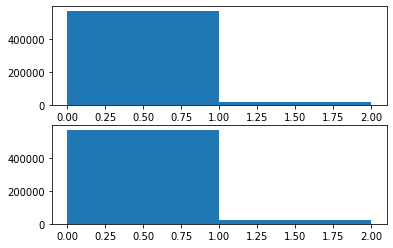

In [20]:
plt.subplot(211)
plt.hist(Y_train, bins=[0,1,2])

plt.subplot(212)
plt.hist(Y_train, bins=[0,1,2])

fraud_count = np.unique(Y_train, return_counts=True)
print("Percentage of Fraud: " + str(round(fraud_count[1][1]/np.sum(fraud_count[1])*100,2)) + "%")

**Downsampling and upsampling**

In [21]:
downsampling_factor = 1
indices_1 = np.argwhere(np.array(Y_train)==1)
indices_0_new = np.argwhere(np.array(Y_train)==0)
indices = np.arange(0,len(indices_0_new),downsampling_factor)
indices_0_new = indices_0_new[indices]

print(indices_0_new.shape)

upsampling_factor = 10
indices_1_new = indices_1
for i in range(upsampling_factor):
  indices_1_new = np.concatenate((indices_1_new, indices_1), axis=0)

indices_0_new = np.concatenate((indices_1_new, indices_0_new), axis=0)

indices_0_new = tf.random.shuffle(indices_0_new)

X_new = np.array(X_train)[indices_0_new]
Y_new = np.array(Y_train)[indices_0_new]

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, test_size=0.01)

X_to_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[2]))
Y_to_train = np.squeeze(Y_train, axis=1)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[2]))
Y_test = np.squeeze(Y_test, axis=1)


print(X_to_train.shape, X_test.shape)

(569877, 1)
(789198, 520) (7972, 520)


**Check the imbalane of the train/test dataset**

Percentage of Fraud: 28.51%


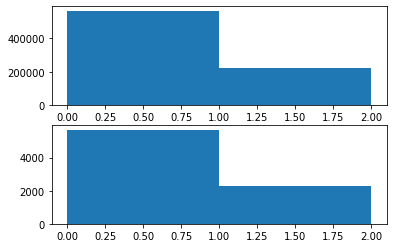

In [22]:
X_new = None
Y_new = None

plt.subplot(211)
plt.hist(Y_to_train, bins=[0,1,2])

plt.subplot(212)
plt.hist(Y_test, bins=[0,1,2])

X_train = None
Y_train = None
X = None
Y = None

fraud_count = np.unique(Y_to_train, return_counts=True)
print("Percentage of Fraud: " + str(round(fraud_count[1][1]/np.sum(fraud_count[1])*100,2)) + "%")

# ***The model using NN***

In [23]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow_addons as tfa
from tensorflow_addons.metrics import F1Score

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def create_model(dense1=128, dense2=64, dense3=32, dropout_rate=0.4, l1_rate=0.001, l2_rate=0.001, init_std=0.01, lr=0.001):
  out_model = Sequential()
  
  out_model.add(Dense(dense1, activation='relu',
                      input_shape=(X_to_train.shape[1],),
                      kernel_regularizer=tf.keras.regularizers.l1(l1_rate),
                      kernel_initializer=tf.keras.initializers.RandomUniform(minval=-init_std, maxval=init_std),
                      activity_regularizer=tf.keras.regularizers.l2(l2_rate)))
  out_model.add(Dense(dense1, activation='relu',
                      kernel_regularizer=tf.keras.regularizers.l1(l1_rate),
                      kernel_initializer=tf.keras.initializers.RandomUniform(minval=-init_std, maxval=init_std),
                      activity_regularizer=tf.keras.regularizers.l2(l2_rate)))
  out_model.add(Dropout(dropout_rate))
  out_model.add(BatchNormalization())

  out_model.add(Dense(dense2, activation='relu',
                      kernel_regularizer=tf.keras.regularizers.l1(l1_rate),
                      kernel_initializer=tf.keras.initializers.RandomUniform(minval=-init_std, maxval=init_std),
                      activity_regularizer=tf.keras.regularizers.l2(l2_rate)))
  out_model.add(Dropout(dropout_rate))
  out_model.add(BatchNormalization())

  out_model.add(Dense(dense3, activation='relu',
                      kernel_regularizer=tf.keras.regularizers.l1(l1_rate),
                      kernel_initializer=tf.keras.initializers.RandomUniform(minval=-init_std, maxval=init_std),
                      activity_regularizer=tf.keras.regularizers.l2(l2_rate)))
  out_model.add(Dropout(dropout_rate))
  out_model.add(BatchNormalization())

  out_model.add(Dense(1, activation="sigmoid"))

  out_model.compile(
            optimizer=Adam(learning_rate=lr),
            loss='binary_crossentropy',
            metrics=[METRICS])
  
  return out_model

In [38]:
#my_model = create_model(dense1=256, dense2=256, dropout_rate=0.4, l1_rate=1e-4, l2_rate=5e-4, init_std=0.1, lr=0.00008)
my_model = create_model(dense1=1024, dense2=256, dense3=64, dropout_rate=0.35, l1_rate=1e-5, l2_rate=1e-4, init_std=0.01, lr=0.00001)
#my_model = tf.keras.models.load_model('./best_model.h5')
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              533504    
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)              

In [39]:
BATCH_SIZE = 128
NB_EPOCH = 2000
PATIENCE = 20

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', patience=PATIENCE, verbose=0, mode='max',
    baseline=None)

best_model_hold = tf.keras.callbacks.ModelCheckpoint(
    filepath='./best_model.h5', monitor='val_auc', verbose=1, save_best_only=True,
    save_weights_only=False, mode='max')

history = my_model.fit(X_to_train, Y_to_train, verbose=0,
             batch_size=BATCH_SIZE, epochs=NB_EPOCH,
             validation_split=0.01, shuffle=True,
             callbacks=[early_stop, best_model_hold])


Epoch 00001: val_auc improved from -inf to 0.84705, saving model to ./best_model.h5

Epoch 00002: val_auc improved from 0.84705 to 0.86864, saving model to ./best_model.h5

Epoch 00003: val_auc improved from 0.86864 to 0.88867, saving model to ./best_model.h5

Epoch 00004: val_auc improved from 0.88867 to 0.89870, saving model to ./best_model.h5

Epoch 00005: val_auc improved from 0.89870 to 0.90764, saving model to ./best_model.h5

Epoch 00006: val_auc improved from 0.90764 to 0.91453, saving model to ./best_model.h5

Epoch 00007: val_auc improved from 0.91453 to 0.92008, saving model to ./best_model.h5

Epoch 00008: val_auc improved from 0.92008 to 0.92094, saving model to ./best_model.h5

Epoch 00009: val_auc improved from 0.92094 to 0.92461, saving model to ./best_model.h5

Epoch 00010: val_auc improved from 0.92461 to 0.92967, saving model to ./best_model.h5

Epoch 00011: val_auc improved from 0.92967 to 0.93311, saving model to ./best_model.h5

Epoch 00012: val_auc improved from

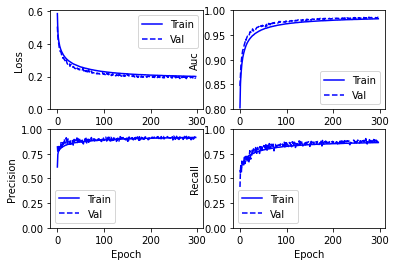

In [40]:
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1) 
    plt.plot(history.epoch,  history.history[metric], color='b', label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color='b', linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

plot_metrics(history)


**F1 validation (From https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model)**

In [41]:
# Save model weights to drive
!cp -r best_model.h5 '/content/gdrive/My Drive/Kaggle/best_model_20200827_METRICS.h5'

#new_model = tf.keras.models.load_model('./best_model.h5', custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU(alpha=0.3)})
new_model = tf.keras.models.load_model('./best_model.h5')
#new_model = tf.keras.models.load_model('/content/gdrive/My Drive/Kaggle/best_model_20200816_METRICS.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1024)              533504    
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)              

In [42]:
def precision_cal(y_pred, y_ref):
  pre = 0
  if np.any(y_pred == 1):
    indices_positive = np.argwhere(y_pred == 1)
    true_pos = np.sum(y_ref[indices_positive])

    if true_pos == len(indices_positive):
      false_pos = 0
    else:
      false_pos = len(indices_positive) - true_pos

    pre = true_pos/(true_pos + false_pos)
  return pre

def recall_cal(y_pred, y_ref):
  recall = 0
  if np.any(y_pred == 1):
    indices_positive = np.argwhere(y_pred == 1)
    true_pos = np.sum(y_ref[indices_positive])

    fals_neg = np.sum(y_ref[np.argwhere(y_pred == 0)])
       
    recall = true_pos/(true_pos + fals_neg)

  return recall

def F1_score(model, X_test, y_ref, test_size, threshold=0.5):
  test_size = test_size
  y_pred = (model.predict(X_test, batch_size=128)>threshold).astype(int)
  y_pred = np.squeeze(y_pred, axis=1)
 
  precision = precision_cal(y_pred, y_ref)
  recall = recall_cal(y_pred, y_ref)

  return precision, recall, 2*precision*recall/(precision+recall)

In [43]:
pre = []
re = []
f1 = []

pre_train = []
re_train = []
f1_train = []

threshold_value = []
indices = np.random.randint(0, len(X_to_train), size=(len(Y_test),))

for i in range(90):
  threshold_value.append(0.1+i*0.01)
  temp_pre, temp_re, temp_f1 = F1_score(new_model, X_test, Y_test, test_size=len(Y_test), threshold=threshold_value[-1])
  
  pre.append(temp_pre)
  re.append(temp_re)
  f1.append(temp_f1)

  temp_pre, temp_re, temp_f1 = F1_score(new_model, X_to_train[indices], Y_to_train[indices], test_size=len(Y_to_train[indices]), threshold=threshold_value[-1])

  pre_train.append(temp_pre)
  re_train.append(temp_re)
  f1_train.append(temp_f1)


0.8983838831082577 0.898121546961326 0.897424511545293 0.41000000000000003


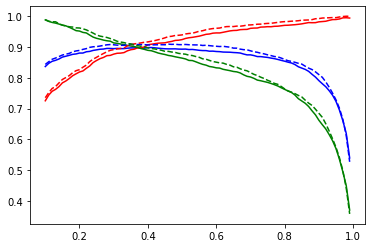

In [44]:
plt.plot(threshold_value, f1, 'b')
plt.plot(threshold_value, pre, 'r')
plt.plot(threshold_value, re, 'g')

plt.plot(threshold_value, f1_train, '--b')
plt.plot(threshold_value, pre_train, '--r')
plt.plot(threshold_value, re_train, '--g')

max_f1_indices = np.where(f1==np.max(f1))[0][0]
print(f1[max_f1_indices], f1[max_f1_indices-1], f1[max_f1_indices+1], threshold_value[max_f1_indices])

In [32]:
def plot_cm(labels, predictions, p=0.5, display=True):
  cm = confusion_matrix(labels, predictions > p)
  if display:
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
  pre = cm[1][1]/(cm[1][1] + cm[0][1])
  recall = cm[1][1]/(cm[1][1] + cm[1][0])
  f1_score = 2*pre*recall/(pre+recall)
  return pre, recall, f1_score

loss :  0.19029086828231812
tp :  1974.0
fp :  162.0
tn :  5525.0
fn :  311.0
accuracy :  0.9406673312187195
precision :  0.9241573214530945
recall :  0.8638949394226074
auc :  0.9860321283340454

Legitimate Transactions Detected (True Negatives):  5484
Legitimate Transactions Incorrectly Detected (False Positives):  203
Fraudulent Transactions Missed (False Negatives):  256
Fraudulent Transactions Detected (True Positives):  2029
Total Fraudulent Transactions:  2285


(0.9090501792114696, 0.887964989059081, 0.8983838831082577)

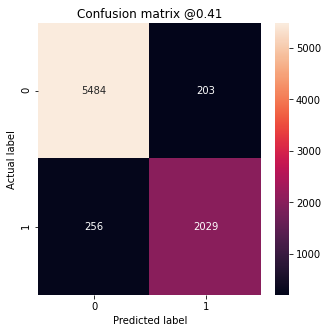

In [50]:
BATCH_SIZE = 128
baseline_results = new_model.evaluate(X_test, Y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(new_model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

predictions = new_model.predict(X_test, batch_size=BATCH_SIZE, verbose=0)

plot_cm(Y_test, predictions, p=threshold_value[max_f1_indices], display=True)


In [48]:
print(max_f1_indices, len(threshold_value), threshold_value[max_f1_indices])

31 90 0.41000000000000003


0.8983838831082577 0.898121546961326 0.897424511545293 0.41000000000000003


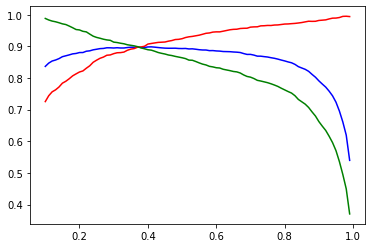

In [51]:
pre2 = []
re2 = []
f12 = []

threshold_value = []

for i in range(90):
  threshold_value.append(0.1+i*0.01)
  temp_pre, temp_re, temp_f1 = plot_cm(Y_test, predictions, p=threshold_value[-1], display=False)
  
  pre2.append(temp_pre)
  re2.append(temp_re)
  f12.append(temp_f1)

plt.plot(threshold_value, f12, 'b')
plt.plot(threshold_value, pre2, 'r')
plt.plot(threshold_value, re2, 'g')

max_f12_indices = np.where(f1==np.max(f12))[0][0]
print(f12[max_f12_indices], f12[max_f12_indices-1], f12[max_f12_indices+1], threshold_value[max_f12_indices])

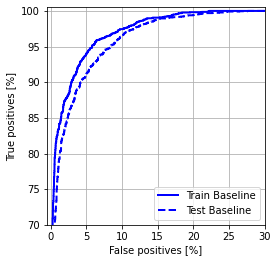

In [52]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,30])
  plt.ylim([70,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

indices = np.random.randint(0, len(X_to_train), size=(len(Y_test),))

train_prediction = new_model.predict(X_to_train[indices], batch_size=BATCH_SIZE, verbose=0)
plot_roc("Train Baseline", Y_to_train[indices], train_prediction, color='b')
plot_roc("Test Baseline", Y_test, predictions, color='b', linestyle='--')
plt.legend(loc='lower right')

Percentage of Fraud: 28.0% 28.66%


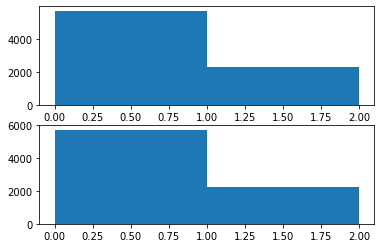

In [53]:
prediction = np.squeeze(predictions, axis=1)
threshold = threshold_value[max_f1_indices]
plt.subplot(211)
plt.hist(Y_test, bins=[0,1,2])

plt.subplot(212)
plt.hist((prediction>threshold).astype('int'), bins=[0,1,2])

fraud_predict = np.unique((prediction>threshold).astype('int'), return_counts=True)
fraud_real = np.unique(Y_test, return_counts=True)
print("Percentage of Fraud: " + str(round(fraud_predict[1][1]/np.sum(fraud_predict[1])*100,2)) + "% " + str(round(fraud_real[1][1]/np.sum(fraud_real[1])*100,2)) + "%")



# ***Output the result into a file for a validation with Kaggle***

In [37]:
import os
os.chdir("/content")
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv', names=saved_columns, header=0)
test_identity.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [38]:
dataset_transaction = None
to_remove_id = ['DeviceInfo', 'id_30', 'id_31', 'id_33']
for column in to_remove_id:
  a = test_identity.pop(column)

In [ ]:
test_identity.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_32,id_34,id_35,id_36,id_37,id_38,DeviceType
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,NaN,F,F,T,F,mobile
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,24.0,match_status:2,T,F,T,T,mobile
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,NaN,F,T,T,F,desktop
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,NaN,F,F,T,F,mobile
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,NaN,F,F,T,F,mobile


In [ ]:
# Remove the columns in to_remove_NaN_dataset_transaction and to_remove_NaN_dataset_identity
for column in to_remove_NaN_dataset_transaction:
  test_transaction.pop(column)

for column in to_remove_NaN_dataset_identity:
  test_identity.pop(column)

In [39]:
merged_data = pd.merge(left=test_transaction, right=test_identity, how='left', left_on='TransactionID', right_on='TransactionID')

TransactionID = merged_data.pop('TransactionID')
test_transaction = None
merged_data.shape

(506691, 428)

In [40]:
test_transaction = copy.copy(merged_data)
merged_data = None
float_columns_test = test_transaction.columns[np.where(test_transaction.dtypes == np.dtype('float64'))].to_list()
int_columns_test = test_transaction.columns[np.where(test_transaction.dtypes == np.dtype('int64'))].to_list()
obj_columns_test = test_transaction.columns[np.where(test_transaction.dtypes == np.dtype('O'))].to_list()

print(len(float_columns_test), len(int_columns_test), len(obj_columns_test))

399 2 27


In [41]:
def apply_normalization(X, indices, cache_min, cache_max, cache_mean, cache_median):
  X_out = copy.copy(X)
  #X_out[indices] = (X_out[indices] - cache_mean)/(cache_max - cache_min)
  X_out[np.where(np.isnan(X_out))[0]] = cache_median
  X_out = (X_out - cache_min)/(cache_max - cache_min)
  #X_out[np.where(np.isnan(X_out))[0]] = 0.0
  return X_out.astype('float16')  


In [42]:
for column in float_columns_test:
  # Set to float 16
  test_transaction[column].astype('float32')

  # Code the NaN feature
  # test_transaction[column + "_NaN_Code"] = np.isnan(test_transaction[column].values).astype('int8')
  
  # Normalization
  X = test_transaction[column]
  indices = np.where(np.isnan(test_transaction[column]) == False)[0]
  test_transaction[column] = apply_normalization(X.to_numpy(), indices, cache[column+'_min'], cache[column+'_max'], cache[column+'_mean'], cache[column+'_median'])

In [43]:
for column in int_columns_test:
  # Set to int 32
  test_transaction[column].astype('int32')

  # Code the NaN feature
  # test_transaction[column + "_NaN_Code"] = np.isnan(test_transaction[column].values).astype('int8')
  
  # Normalization
  X = test_transaction[column]
  indices = np.where(np.isnan(test_transaction[column]) == False)[0]
  test_transaction[column] = apply_normalization(X.to_numpy(), indices, cache[column+'_min'], cache[column+'_max'], cache[column+'_mean'], cache[column+'_median'])

In [44]:
encoded_column = 0
for column in obj_columns_test:
  ohc = OneHotEncoder(handle_unknown='ignore')
  ohc.fit(cache[column])
  test_transaction.loc[np.where(test_transaction[column].isnull())[0], column] = 'Null'
  encoded = ohc.transform(test_transaction[column].values.reshape(-1,1)).toarray()    
  pd_encoded = pd.DataFrame(encoded.astype('int8'), columns=[column+"_"+str(i) for i in range(len(np.unique(cache[column])))])
  test_transaction = pd.concat([test_transaction, pd_encoded], axis=1)
  encoded_column += len(pd_encoded.columns)

print("Encoded columns: " + str(encoded_column))


for column in obj_columns_test:
  try:
    test_transaction.pop(column)
  except KeyError:
    pass

for column in to_remove:
  try:
    test_transaction.pop(column)
  except KeyError:
    pass



Encoded columns: 207


In [45]:
# Check if we have the same shape with the X_train
#print(test_transaction.shape, X_train.shape)
print(test_transaction.shape)

(506691, 520)


In [45]:
# Make the prediction and submit the output
threshold = threshold_value[max_f1_indices]
#threshold = 0.4
result = (new_model.predict(test_transaction, batch_size=BATCH_SIZE)>threshold).astype('int8')
result_pd = pd.DataFrame(result, columns=['isFraud'])
data_to_file = pd.concat([TransactionID, result_pd], axis=1)
data_to_file.head(5)
data_to_file.to_csv("./submission.csv", index=False)
data_to_file.to_csv('/content/gdrive/My Drive/Kaggle/submission.csv', index=False)

In [46]:
!kaggle competitions submit -c ieee-fraud-detection -f submission.csv -m "New submission with model_20200826 with threshold {threshold}"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# ***Debug zone***

In [ ]:
indices = np.where(np.isnan(a) == False)[0]
min_value, max_value, mean_value, normalized_data = normalization_data(a, indices)
print(min_value, max_value, mean_value, np.mean(normalized_data), np.min(normalized_data), np.max(normalized_data))
dataset_transaction['V331'] = normalized_data

0.0 160000.0 721.7418829164045 -2.2733716828843707e-16 -0.004510886768227528 0.9954891132317726


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
a = {'a': ['Null', 'A', 'B', 'C', 'D']}
df = pd.DataFrame(a)
df
encoded = ohc.fit_transform(df['a'].values.reshape(-1,1)).toarray()    
pd_encoded = pd.DataFrame(encoded.astype('int8'), columns=["a"+"_"+str(i) for i in range(len(np.unique(df['a'].astype('str'))))])
pd_encoded


,a_0,a_1,a_2,a_3,a_4
0,0,0,0,0,1
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [ ]:
b = {'a': ['Null', 'A', 'B', 'C', 'E']}
df_b = pd.DataFrame(b)
ohc_b = OneHotEncoder(handle_unknown='ignore')
ohc_b.fit(df['a'].values.reshape(-1,1))
encoded_b = ohc_b.transform(df_b['a'].values.reshape(-1,1)).toarray()    
pd_encoded_b = pd.DataFrame(encoded_b.astype('int8'), columns=["a"+"_"+str(i) for i in range(len(np.unique(df['a'].astype('str'))))])
pd_encoded_b

,a_0,a_1,a_2,a_3,a_4
0,0,0,0,0,1
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0


In [ ]:
for column in obj_columns:
  dataset_transaction.loc[np.where(dataset_transaction[column].isnull())[0], column] = 'Null'
  print(column, len(np.unique(dataset_transaction[column].astype("str"))))

ProductCD 5
card4 5
card6 5
P_emaildomain 60
R_emaildomain 61
M1 3
M2 3
M3 3
M4 4
M5 3
M6 3
M7 3
M8 3
M9 3


In [ ]:
for column in obj_columns_test:
  test_transaction.loc[np.where(test_transaction[column].isnull())[0], column] = 'Null'
  print(column, len(np.unique(test_transaction[column].astype("str"))))

ProductCD 5
card4 5
card6 4
P_emaildomain 61
R_emaildomain 61
M1 3
M2 3
M3 3
M4 4
M5 3
M6 3
M7 3
M8 3
M9 3


**Train val dataset**